In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
test_dataset = torchvision.datasets.MNIST(root='.',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download = True)

In [7]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [8]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
# data loader standardizes data. Divides by the max

In [12]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        inputs,targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1,784)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_loader:
        inputs,targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1,784)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4179, Test Loss: 0.2245
Epoch 2/10, Train Loss: 0.1943, Test Loss: 0.1633
Epoch 3/10, Train Loss: 0.1432, Test Loss: 0.1236
Epoch 4/10, Train Loss: 0.1129, Test Loss: 0.1100
Epoch 5/10, Train Loss: 0.0917, Test Loss: 0.0974
Epoch 6/10, Train Loss: 0.0760, Test Loss: 0.0914
Epoch 7/10, Train Loss: 0.0652, Test Loss: 0.0874
Epoch 8/10, Train Loss: 0.0543, Test Loss: 0.0787
Epoch 9/10, Train Loss: 0.0471, Test Loss: 0.0759
Epoch 10/10, Train Loss: 0.0396, Test Loss: 0.0771


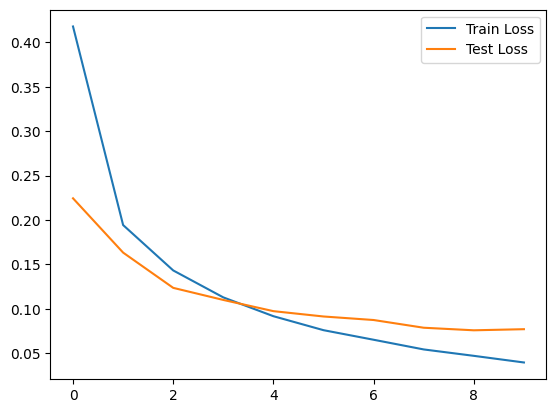

In [13]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [16]:
n_correct = 0
n_samples = 0

for inputs, targets in train_loader:
  inputs,targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  n_samples += targets.shape[0]
  n_correct += (predictions == targets).sum().item()

train_acc = n_correct / n_samples

n_correct = 0
n_samples = 0

for inputs, targets in test_loader:
  inputs,targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  n_samples += targets.shape[0]
  n_correct += (predictions == targets).sum().item()

test_acc = n_correct / n_samples

print(f'train acc: {train_acc:.4f}, test acc: {test_acc:.4f}')


train acc: 0.9915, test acc: 0.9766


In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  tresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > tresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[ 969    0    1    0    0    1    5    1    2    1]
 [   0 1123    3    3    0    1    2    1    2    0]
 [   5    2 1005    5    1    1    2    3    8    0]
 [   0    0    2  993    0    4    0    5    2    4]
 [   1    0    3    2  940    0   14    5    2   15]
 [   2    0    0    6    1  874    2    1    3    3]
 [   3    3    1    1    2    4  944    0    0    0]
 [   1    4   10    6    0    0    0  999    1    7]
 [   6    2    1    9    3    3    3    2  941    4]
 [   2    4    0    7    7    4    2    4    1  978]]


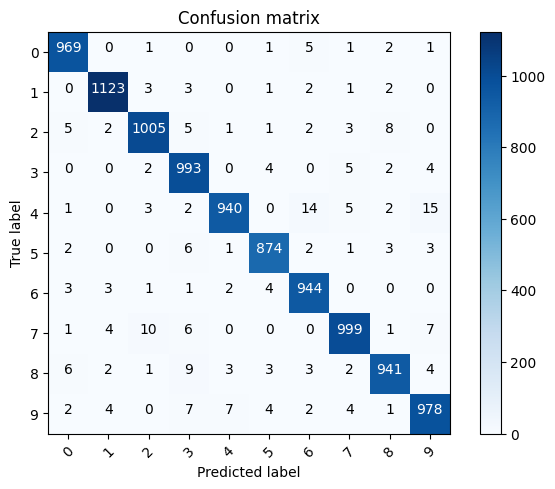

In [20]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs,targets in test_loader:
  inputs = inputs.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4, Predicted: 6.0')

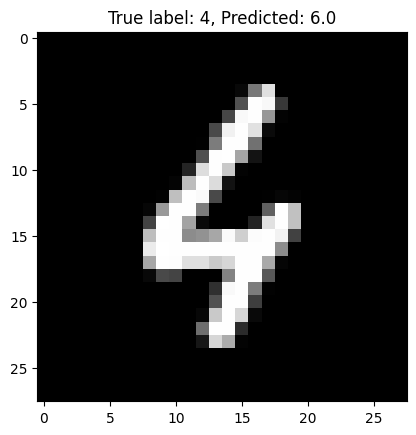

In [23]:
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (y_test[i], p_test[i]))